<a href="https://colab.research.google.com/github/Mic-73/GenAI/blob/main/problem1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Mic-73/GenAI/blob/main/HW1/problem1.ipynb)

---
# Author: Michael Wood
---

# Code

Initial code/functions taken from in-class exercise:
https://github.com/bforoura/GenAI/blob/main/Module1/prob_example2.ipynb

Modifications were made according to the assignment and identified in the comments in the code below.

In [28]:
#@title Importing Libraries

# numerical operations
import numpy as np

# used for plotting
import matplotlib.pyplot as plt

# used for calculating distances
from scipy.spatial import distance

In [29]:
#@title Defining Known Land Mass Points

# A dictionary where each key is a continent and the value is a list of tuples
# representing points on that continent.

land_points = {
    'South America': [(-30, -60), (-15, -50), (0, -45), (15, -30), (30, -20)],
    'Australia': [(50, 10), (55, 0), (60, 10), (65, 20), (70, 30)],
    'Asia': [(20, 60), (30, 70), (40, 80), (50, 90), (60, 100)],
    'Africa': [(0, 20), (10, 20), (20, 30), (30, 40), (40, 50)],
    'Europe': [(-35, 140), (-30, 145), (-25, 150), (-20, 155), (-15, 160)]
}

In [30]:
#@title Defining a Grid of Points

# Create a grid of points with latitude ranging from -90 to 90 and longitude
# from -180 to 180 in steps of 1.

grid_points = [(x, y) for x in range(-90, 91, 1) for y in range(-180, 181, 1)]

In [32]:
#@title Classifying Points

# This function classifies a point as:
# 'Coastline': If the point lies within the bounds of the box and is within a certain distance of any land point.
# 'Land': If the point lies within the bounds of the box and is not within a certain distance of any land point.
# 'Sea': If the point lies outside the bounds of the box.

def classify_point(point, box_bounds):

    # Array of all land points
    all_land_points = [point for points in land_points.values() for point in points]

    # Box bounds
    x_min, x_max, y_min, y_max = box_bounds

    # Classify data points
    if x_min <= point[0] <= x_max and y_min <= point[1] <= y_max:
      distances_to_land = distance.cdist([point], all_land_points, 'euclidean').min()
      if distances_to_land <= 10:
        return 'Coastline'
      else:
        return 'Land'
    else:
        return 'Sea'

In [33]:
#@title Plotting the Points and Model

# This functions plots the land points, test points, and the bounding box of
# the land model on a 2D plot.

# Function to plot the points and the model
def plot_points(land_points, test_points, test_classifications, box_bounds):
    fig, ax = plt.subplots()

    # Define colors for each continent
    continent_colors = {
        'South America': 'green',
        'Europe': 'red',
        'Asia': 'blue',
        'Africa': 'purple',
        'Australia': 'orange'
    }

    # Plot land points by continent
    for continent, points in land_points.items():
        land_x, land_y = zip(*points)
        ax.scatter(land_x, land_y, color=continent_colors[continent], label=f'{continent}')

    # Highlight land model with an orange box
    x_min, x_max, y_min, y_max = box_bounds
    land_model_x = [x_min, x_max, x_max, x_min, x_min]
    land_model_y = [y_min, y_min, y_max, y_max, y_min]
    ax.plot(land_model_x, land_model_y, color='orange', label='Land Model')

    # Plot test points, classification for 'Coastline' added here
    for point, classification in zip(test_points, test_classifications):
        if classification == 'Land':
          color = 'green'
        elif classification == 'Coastline':
          color = 'turquoise'
        else:
          color = 'blue'
        ax.scatter(point[0], point[1], color=color, edgecolors='red', label=f'Test Point ({classification})')

    # Place the legend outside the plot box
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xlabel('Latitude')
    plt.ylabel('Longitude')
    plt.title('Land, Coastline, and Sea Points with Model')
    plt.grid(False)  # Remove grid
    plt.show()


Test Point Classifications:
Point (-20, -40): Land
Point (20, 75): Land
Point (50, 50): Coastline
Point (-30, 160): Land
Point (80, -170): Sea
Point (-55, 150): Sea
Point (-50, 50): Sea
Point (40, 55): Coastline
Point (60, 0): Coastline
Point (-25, 160): Coastline
Point (-40, 170): Sea
Point (-55, -150): Sea
Point (0, -35): Coastline
Point (20, 20): Coastline
Point (40, 75): Coastline
Point (-40, -100): Sea
Point (60, 45): Land
Point (-20, 50): Land


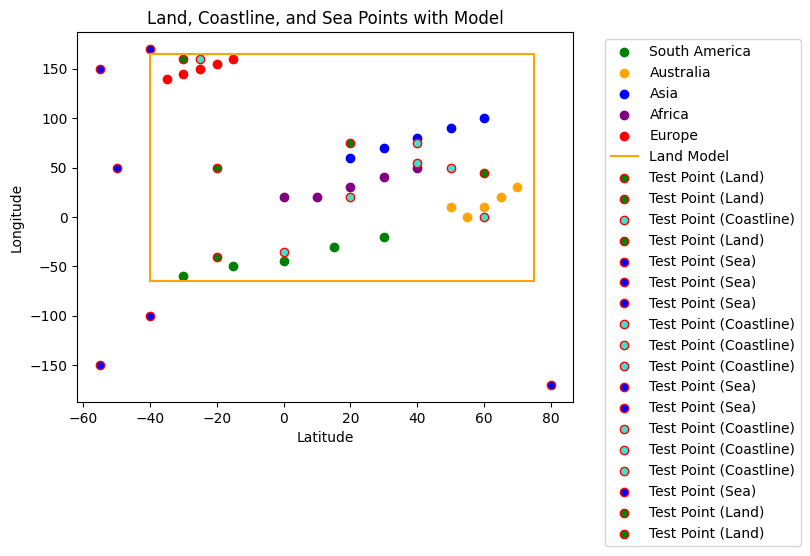

In [34]:
#@title Main Execution

# This section calculates the total grid points, defines the model box,
# classifies test points, prints the classifications, and
# plots the points and the model.

# Total points in the grid
total_points = len(grid_points)

# Define the bounds of the model box
all_land_x = [point[0] for points in land_points.values() for point in points]
all_land_y = [point[1] for points in land_points.values() for point in points]
x_min, x_max = min(all_land_x) - 5, max(all_land_x) + 5
y_min, y_max = min(all_land_y) - 5, max(all_land_y) + 5
box_bounds = (x_min, x_max, y_min, y_max)

# Define unknown test cases
test_points = [
    # Land points inside the model
    (-20, -40), (20, 75), (50, 50), (-30, 160), (80, -170), (-55, 150),
    (-50, 50), (40, 55), (60, 0), (-25, 160), (-40, 170), (-55, -150),
    (0, -35), (20, 20), (40, 75), (-40, -100), (60, 45), (-20, 50)
]

# Classify test points
test_classifications = [classify_point(point, box_bounds) for point in test_points]

# Print test point classifications
print("\nTest Point Classifications:")
for point, classification in zip(test_points, test_classifications):
    print(f"Point {point}: {classification}")

# Plot the points and the model
plot_points(land_points, test_points, test_classifications, box_bounds)